# Classification

In [23]:
#----- utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from mpl_toolkits.mplot3d import Axes3D
import copy

#----- models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.manifold import TSNE
from sklearn.naive_bayes import GaussianNB

In [24]:
df = pd.read_csv('processedData/TreeFeatureTable.csv', dtype = {'sample_name':str})
#df_sex = pd.read_csv('datasets/sample_metadata_clean.tsv', sep = '\t', dtype = str)

In [25]:
y = df.label
X = df.drop(['label','sample_name'], axis = 1)
X = X.astype(float)
ids = df.sample_name
out_ids = df.drop(['label','sample_name'], axis = 1).columns

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, stratify = y, random_state = 7)

## Count matrix

In [27]:
seed = 7

models = []
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('Tree', DecisionTreeClassifier()))
models.append(('ETree', ExtraTreeClassifier()))
models.append(('HistGB', HistGradientBoostingClassifier()))
models.append(('XGBOOST', XGBClassifier()))
models.append(('GB', GradientBoostingClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
	kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = seed)
	cv_results = cross_val_score(model, X, y, cv = kfold, scoring = scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

GNB: 0.540000 (0.109341)
RF: 0.520000 (0.151438)
Tree: 0.360000 (0.090431)
ETree: 0.320000 (0.083267)
HistGB: 0.493333 (0.095219)
XGBOOST: 0.480000 (0.142361)
GB: 0.520000 (0.102415)


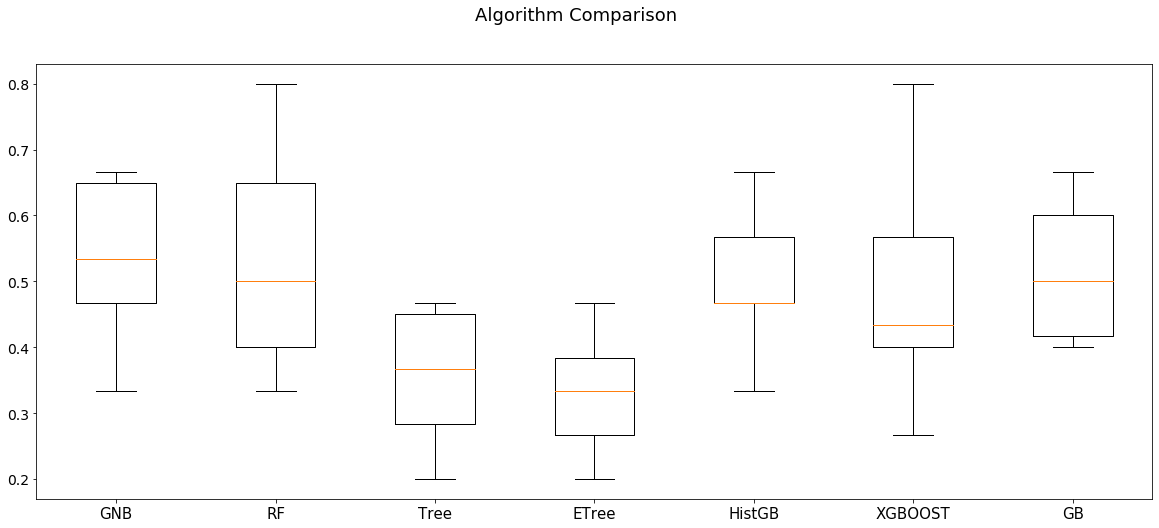

In [31]:
fig = plt.figure(figsize = (20, 8))
fig.suptitle('Algorithm Comparison', size = 18)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(size = 15)
plt.yticks(size = 14)
plt.show()

In [32]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
print(classification_report(y_test, pred, digits = 4, target_names = ['Alcohol', 'Smoke',
                                                                      'Alcohol&Smoke', 'NoAlcoholNoSmoke']))

                  precision    recall  f1-score   support

         Alcohol     0.4286    0.4286    0.4286         7
           Smoke     0.8333    0.6250    0.7143         8
   Alcohol&Smoke     0.7500    0.4286    0.5455         7
NoAlcoholNoSmoke     0.5385    0.8750    0.6667         8

        accuracy                         0.6000        30
       macro avg     0.6376    0.5893    0.5887        30
    weighted avg     0.6408    0.6000    0.5955        30



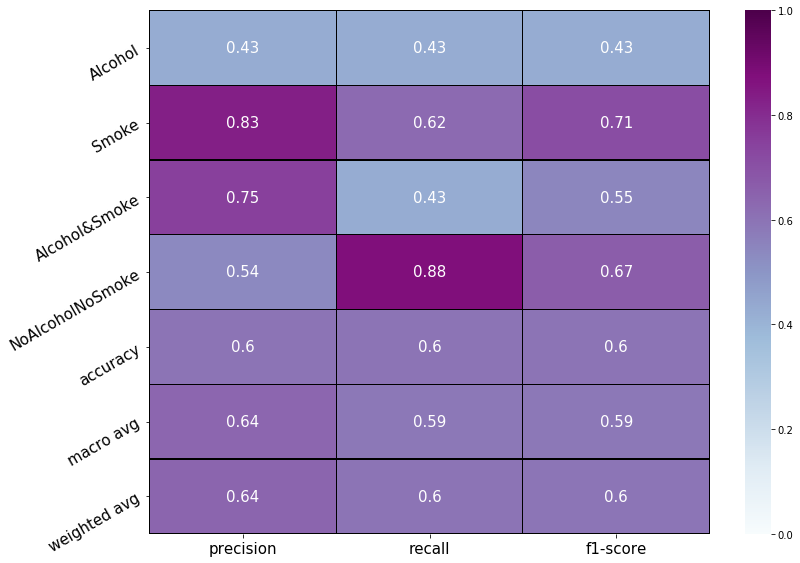

In [41]:
cr_count = classification_report(y_test, pred, digits = 4,
                                 output_dict=True, target_names=['Alcohol', 'Smoke',
                                                                 'Alcohol&Smoke', 'NoAlcoholNoSmoke'])
plt.figure(figsize = (12, 8))
sns.heatmap(pd.DataFrame(cr_count).iloc[:-1, :].T, annot=True,
            vmin=0.0, vmax=1.0, linewidths=0.2, linecolor='black',
            cmap = 'BuPu', annot_kws={'size':15, 'color':'white'})
plt.xticks(size = 15)
plt.yticks(size = 15, rotation = 30)
plt.tight_layout()

## Binary (presence-absence) matrix

In [34]:
X_binary = copy.deepcopy(X)
X_binary = X_binary.astype(float)
X_binary[X_binary > 0] = 1

In [35]:
X_trainB, X_testB, y_trainB, y_testB = train_test_split(X_binary, y, test_size = .2, stratify = y, random_state = 7)

In [36]:
seed = 7

models = []
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('Tree', DecisionTreeClassifier()))
models.append(('ETree', ExtraTreeClassifier()))
models.append(('HistGB', HistGradientBoostingClassifier()))
models.append(('XGBOOST', XGBClassifier()))
models.append(('GB', GradientBoostingClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
	kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = seed)
	cv_results = cross_val_score(model, X_binary, y, cv = kfold, scoring = scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

GNB: 0.480000 (0.132665)
RF: 0.520000 (0.160000)
Tree: 0.493333 (0.095219)
ETree: 0.366667 (0.116428)
HistGB: 0.480000 (0.106667)
XGBOOST: 0.480000 (0.135974)
GB: 0.533333 (0.078881)


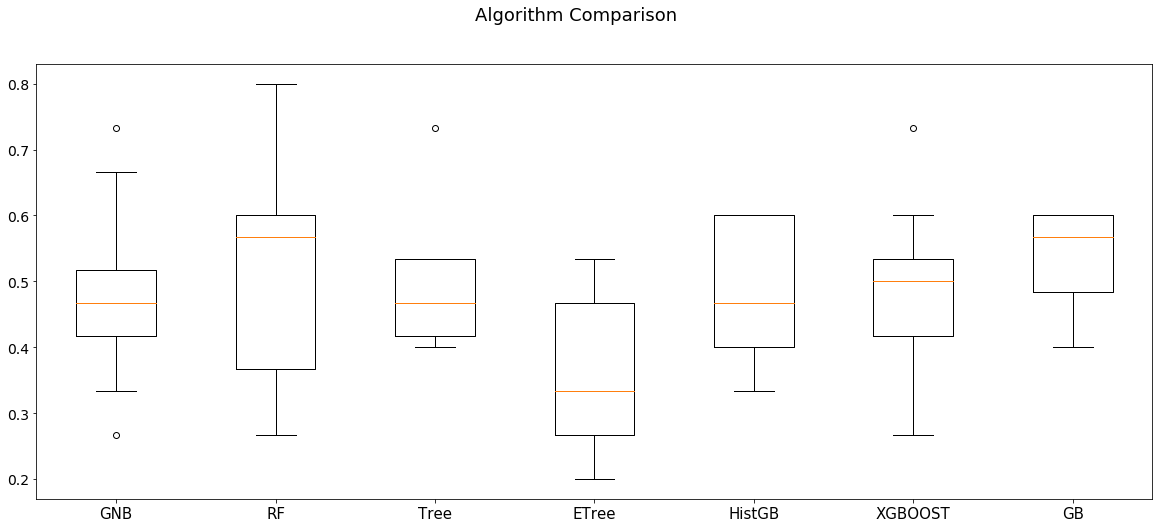

In [37]:
fig = plt.figure(figsize = (20, 8))
fig.suptitle('Algorithm Comparison', size = 18)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(size = 15)
plt.yticks(size = 14)
plt.show()

In [38]:
gb = GradientBoostingClassifier()
gb.fit(X_trainB, y_trainB)
predB = gb.predict(X_testB)
print(classification_report(y_testB, predB, digits = 4, target_names = ['Alcohol', 'Smoke',
                                                                      'Alcohol&Smoke', 'NoAlcoholNoSmoke']))

                  precision    recall  f1-score   support

         Alcohol     0.6250    0.7143    0.6667         7
           Smoke     0.6667    0.5000    0.5714         8
   Alcohol&Smoke     0.5714    0.5714    0.5714         7
NoAlcoholNoSmoke     0.5556    0.6250    0.5882         8

        accuracy                         0.6000        30
       macro avg     0.6047    0.6027    0.5994        30
    weighted avg     0.6051    0.6000    0.5981        30



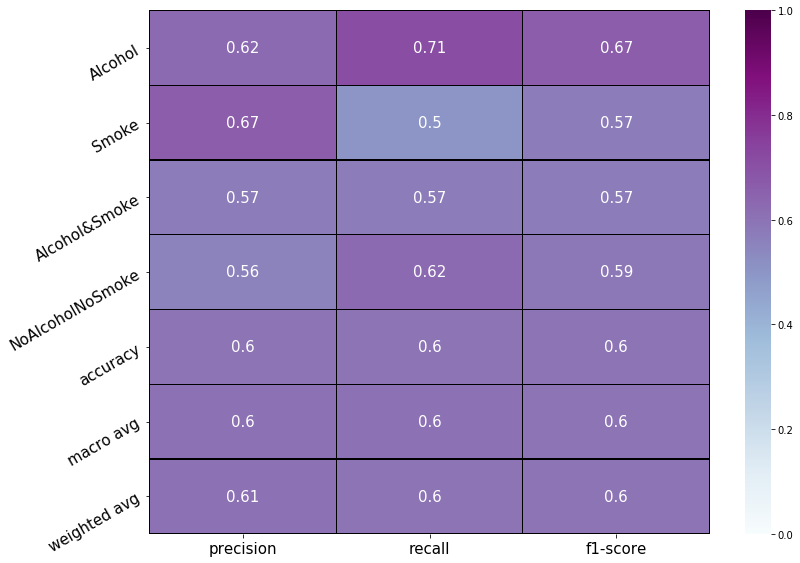

In [42]:
cr_binary = classification_report(y_testB, predB, digits = 4,
                                 output_dict=True, target_names=['Alcohol', 'Smoke',
                                                                 'Alcohol&Smoke', 'NoAlcoholNoSmoke'])
plt.figure(figsize = (12, 8))
sns.heatmap(pd.DataFrame(cr_binary).iloc[:-1, :].T, annot=True,
            vmin=0.0, vmax=1.0, linewidths=0.2, linecolor='black',
            cmap = 'BuPu', annot_kws={'size':15, 'color':'white'})
plt.xticks(size = 15)
plt.yticks(size = 15, rotation = 30)
plt.tight_layout()